# **EXPLORATORY DATA ANALYSIS (EDA) - Datos de criptomonedas**
En este notebook, realizaremos un Análisis Exploratorio de Datos (EDA) de un conjunto de datos que contiene información sobre 12 criptomonedas. El EDA es una etapa fundamental en cualquier proyecto de análisis de datos, ya que nos permite comprender en profundidad nuestros datos, identificar patrones, tendencias y relaciones entre variables clave.

# **Pasos Claves**
Durante nuestro análisis, realizaremos los siguientes pasos:

1. **Recopilación de Datos:** Cargaremos y exploraremos el conjunto de datos que contiene información sobre el precio, volumen y capitalización de mercado de 12 criptomonedas a lo largo de 5 años. Se analizarán valores nulos, valores duplicados y que los datos tengan en formato correcto para su análisis.

2. **Estadísticas Descriptivas:** Calcularemos estadísticas básicas para cada columna, como la media, mediana y desviación estándar, para tener una visión general de los valores en nuestros datos.

3. **Visualización de Datos:** Utilizaremos gráficos y visualizaciones para representar los datos de manera efectiva. Esto incluye gráficos de líneas, histogramas, detección de valores atípicos.

4. **Análisis bivariado, Correlación y Relaciones:** Analizaremos las relaciones entre dos variables, la correlación entre las mismas y entre criptomonedas y exploraremos posibles relaciones entre ellas.

5. **Conclusiones:** A partir de nuestros hallazgos, se detallan las principales conclusiones. 

# **Comencemos el Análisis**

### *Librerias Necesarias*

In [2]:
#Librerias para análisis de datos
import pandas as pd
import numpy as np
#Librerias para visualización de datos 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
# Configurar la opción de formato para mostrar números en su forma original
pd.set_option('display.float_format', '{:.4f}'.format)

## **1. Recopilación de los datos**

Los datos se encuentran distribuidos en 12 datasets para cada criptomoneda en un periodo de 5 años desde el 15 de Agosto del 2018 hasta el 15 de Agosto del 2023, sin embargo para desarrollar un trabajo más ordenado se emplea unicamente el dataset consolidado que cuenta con la información de precios, volumen de transacción y capitalización de mercado de las criptomonedas escogidas. 

### **Importamos el dataset**

In [3]:
#Crear df a partir del dataset consolidado
cryptos_df = pd.read_csv("datasets\cryptos_total.csv")

### **Información acerca de la data**

In [4]:
#Revisar la cantidad, existencia de valores nulos y tipo de datos
cryptos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19904 entries, 0 to 19903
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          19904 non-null  object 
 1   Prices      19904 non-null  float64
 2   Volumes     19904 non-null  float64
 3   Market_Cap  19904 non-null  float64
 4   Date        19904 non-null  object 
dtypes: float64(3), object(2)
memory usage: 777.6+ KB


- Se tiene 19904 registros, de los cuales **ninguno es un valor nulo**.
- Las columnas prices, Volumes y Market_Cap son variables del tipo float, en otras palabras, cuantitativas continuas.
- La columna Date necesita ser transformada a formato datetime, el resto de columnas tiene el formato de dato correcto. 


In [5]:
#Transformar a formato datetime
cryptos_df['Date'] = pd.to_datetime(cryptos_df['Date'])

### **Existencia de duplicados**

In [6]:
# Verificar duplicados en todo el DataFrame
duplicates = cryptos_df.duplicated()

# Contar el número total de filas duplicadas
total_duplicates = duplicates.sum()
# Imprimir el número total de filas duplicadas de existir
print(f"El dataframe tiene {total_duplicates} filas duplicadas")

El dataframe tiene 0 filas duplicadas


### **Visualización de importancia de criptomonedas**
Las criptomonedas que son analizadas en este EDA fueron escogidas de acuerdo a su ponderación en capitalización de mercado y por la estimación de crecimiento que tienen (Detallado en el ETL), a continuación se muestran las criptomendas analizadas ordenadas de acuerdo a su importancia en el mercado.

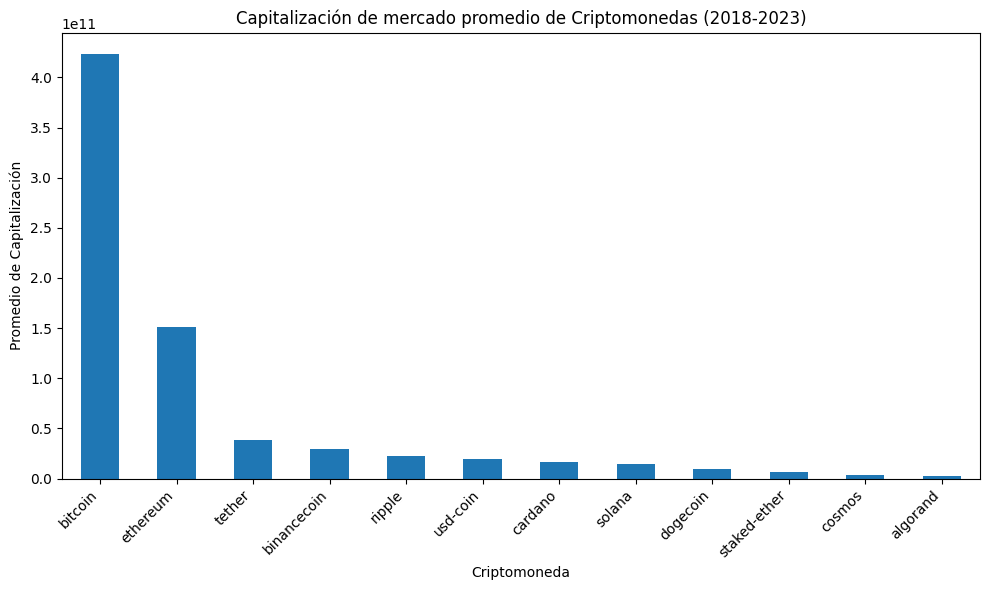

In [33]:
# Agrupar los datos por ID y calcular el promedio del MarketCap para cada grupo
grouped_df = cryptos_df.groupby('Id')['Market_Cap'].mean()
# Ordenar el DataFrame por MarketCap en orden descendente
cryptos_df_sorted = grouped_df.sort_values(ascending=False)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cryptos_df_sorted.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Criptomoneda')
plt.ylabel('Promedio de Capitalización')
plt.title('Capitalización de mercado promedio de Criptomonedas (2018-2023)')

# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()


- En el periodo 2018 - 2023, con valores promedio la criptomoneda que tuvo mayor importancia en el mercado medida a través de su capitalización fue Bitcoin, seguida de Ethereum y Tether. 
- Algorand y Cosmos, si bien no tienen una capitalización promedio considerable en comparación con otras monedas, estas son clasificadas como activos con mucho futuro según Investing. 

### **Ejemplo del dataframe final**

In [8]:
cryptos_df.sample(10)

Id   Prices         Volumes       Market_Cap       Date
8597        ripple   0.6977 5932775744.1386 33453595245.0036 2022-02-25
19283       cosmos  28.2799  446846473.5722  8019762550.9370 2021-12-03
9537      usd-coin   1.0016  236972312.2808   453176167.5470 2019-11-12
12496      cardano   0.0414  286509553.6850  1287837852.5131 2020-04-25
6899   binancecoin 219.3541  656650022.6505 35811629796.3998 2022-07-04
9108        ripple   0.7933 2588946338.4564 41729123773.5722 2023-07-21
10063     usd-coin   0.9985 2366393732.7055 13003119763.9660 2021-04-21
17837     algorand   0.4176  131436771.0903  2879118581.4382 2022-06-09
16795     algorand   0.5550   58912837.7940    94731315.1070 2019-08-02
6183   binancecoin  17.0799  144813495.0179  2523851243.1159 2020-07-18

## **2. Estadisticas descriptivas**

El dataframe cuenta con los precios, volumen de negociación y capitalización de mercado para las 12 criptomonedas escogidas, por lo que un enfoque válido seria crear mascaras para cada coin y realizar un análisis descriptivo independiente. Sin embargo, se opto por agrupar los datos de las coin por su Id y generar estadisticas en función a las columnas. 

### **Agrupación por ID**

In [9]:
#Agrupar las cryptos por ID y se aplica la función describe. 
grouped_describe = cryptos_df.groupby('Id').describe()

### **Estadisticas descriptivas de los Precios**

In [10]:
#Seleccionar la columna Prices de los datos agrupados
grouped_describe['Prices']

count       mean        std       min       25%        50%  \
Id                                                                            
algorand     1517.0000     0.5918     0.5037    0.1060    0.2373     0.3368   
binancecoin  1827.0000   185.1484   181.2289    4.4703   18.0660   129.3750   
bitcoin      1827.0000 22517.0854 16535.4332 3216.6271 8696.5470 18866.8103   
cardano      1827.0000     0.5047     0.6250    0.0237    0.0653     0.2800   
cosmos       1634.0000    11.7532     9.5284    1.6092    4.3706     9.2481   
dogecoin     1827.0000     0.0714     0.0971    0.0015    0.0026     0.0506   
ethereum     1827.0000  1283.0924  1200.5951   83.7860  209.2385  1191.1308   
ripple       1827.0000     0.4796     0.2868    0.1378    0.2892     0.3827   
solana       1222.0000    45.5563    56.2944    0.5139    7.9895    24.5183   
staked-ether  967.0000  2201.6549   920.9394  596.7677 1563.1320  1871.9117   
tether       1826.0000     1.0004     0.0029    0.9755    0.9996     1.0004   
usd-coin     1776.0000     1.0012     0.0045    0.9656    0.9995     1.0004   

                    75%        max  
Id                                  
algorand         0.8568     3.1724  
binancecoin    314.0317   675.0990  
bitcoin      33816.3363 67617.0155  
cardano          0.6377     2.9671  
cosmos          14.1313    43.8450  
dogecoin         0.0879     0.6818  
ethereum      1898.1732  4815.0046  
ripple           0.5721     1.8377  
solana          44.4384   259.2396  
staked-ether  2865.9684  4775.4528  
tether           1.0014     1.0157  
usd-coin         1.0018     1.0435

1. Las criptomonedas **Algorand, Cosmos, Solana, Staked-Ether y USD-Coin** tienen menos registros por que sus fechas de inicio de circulación en el mercado fueron posteriores a la fecha de cohorte 15 de Agosto del 2018. 

2. **Las desviaciones estandar de los precios de Tether y USD-Coin son bajas respecto a su media**, lo que financieramente se traduce como activos con baja volatilidad y de poco riesgo. Esto se explica por que ambas son consideradas "stablecoins" por su paridad con el dolar americano de 1 a 1, logrando una "equivalencia". 

3. **Las desviaciones estandar de los precios del resto de criptomonedas son altas respecto a su media**, esto las califica como activos financieros de alta volatilidad y mucho riesgo. Caracteristica común en el mercado cripto. 

4. **Las "stablecoins" Tether y USD-Coin, tienen una media(mean) y mediana(Percentil 50) similar**, lo que indica una simetria en la distribución de sus precios, reduciendo la posibilidad de encontrar valores atipicos. 

5. **El resto de criptomonedas analizadas tienen una media mayor a su mediana**, evidenciando una asimetria y sesgo en la distribución de precios. Esto podría indicar que hay valores relativamente altos que están afectando la media, lo que puede estar asociado con la presencia de valores atípicos en el extremo superior de la distribución.

### **Estadisticas descriptivas de los Volumenes de Negociación**

In [11]:
#Seleccionar la columna Volumes de los datos agrupados
grouped_describe['Volumes']

count             mean              std             min  \
Id                                                                         
algorand     1517.0000   201962744.1911   270477356.7267     665318.0527   
binancecoin  1827.0000  1048579960.0988  1615823930.3300    7692710.4510   
bitcoin      1827.0000 27899672867.2527 17932557981.5307 1464404365.5171   
cardano      1827.0000  1096632999.5175  1878294005.4550   14545306.5316   
cosmos       1634.0000   391669375.3849   439950729.4147         18.9116   
dogecoin     1827.0000  1128612360.1721  3415178902.9592    2082911.6567   
ethereum     1827.0000 14669144441.0256 13011965085.5079  977416380.6936   
ripple       1827.0000  2864202007.3173  3810107985.1275  174306308.6986   
solana       1222.0000   982723493.8101  1289607541.5159     548910.1111   
staked-ether  967.0000    22945868.6134    53180014.7901         62.1798   
tether       1826.0000 44940586795.9485 45232724135.2444   31057541.5082   
usd-coin     1776.0000  2462744198.7606  3432680222.9416      20254.7123   

                          25%              50%              75%  \
Id                                                                
algorand        67819812.9223   112457805.0230   233993838.3773   
binancecoin    219824265.5493   451076761.2172  1285033737.3299   
bitcoin      17156857849.0668 24663035431.3521 36000846583.5055   
cardano        136697989.8478   373891185.4703  1063363833.7858   
cosmos         131275181.8212   215164200.8364   488667015.5430   
dogecoin        74876139.7906   238620016.7064   900844317.4256   
ethereum      6880857080.5561 11128989594.3610 18179881363.2349   
ripple        1118646723.5902  1784282944.3490  3089951159.5977   
solana         112046255.3025   571714478.4080  1363988576.0413   
staked-ether     3499707.9718    10173832.8112    22670334.4803   
tether       22586043810.6735 37529383201.5474 57238954325.7840   
usd-coin       460894767.6980  1973339000.9801  3621132126.9463   

                           max  
Id                              
algorand       4496664016.0499  
binancecoin   22103516567.7071  
bitcoin      178894068361.3531  
cardano       17436012662.3244  
cosmos         3497675035.8980  
dogecoin      50960650646.9508  
ethereum     140906534190.5879  
ripple        62468131981.5654  
solana        16149087501.3010  
staked-ether    834985189.5779  
tether       926767674515.1360  
usd-coin     110291776337.1864

Teniendo en cuenta que el volúmen de negociación es la cantidad de transacciones/operaciones que se realizan de un determinado activo, se explica lo siguiente de acuerdo al cuadro mostrado:
1. En **todas las criptomonedas** la media de volumenes de negociación en el horizonte de 5 años es mayor a su mediana, mostrando un sesgo en la distribución de los volumenes y explicando periodos con volumenes altos que afectan la media. 
2. Las criptomonedas con mayor volumen son **Bitcoin, Ethereum y la stablecoin**, que las califica como las criptomonedas que generan más interés o emoción en el mercado.  
3. **Las desviaciones estandar de todas las criptomonedas analizadas son altas respecto a su media**, esto se explica en la elevada variabilidad de la demanda y oferta en el mercado cripto y que los volúmenes tienden a experimentar movimientos de compra y venta más rápidos y amplios en un período corto de tiempo. Esto puede llevar a cambios abruptos en los precios de mercado. 

### **Estadisticas descriptivas de la Capitalización de Mercado**

In [12]:
#Seleccionar la columna Market_Cap de los datos agrupados
grouped_describe['Market_Cap']

count              mean               std              min  \
Id                                                                            
algorand     1517.0000   2368077069.5700   3025469193.3067           0.0000   
binancecoin  1827.0000  29630606115.6521  29512139375.5323   645951230.7893   
bitcoin      1827.0000 423300791726.3334 313903804614.5402 55998515509.3886   
cardano      1827.0000  16392947229.9605  20032692031.4680   733569243.5414   
cosmos       1634.0000   3173356695.9743   2755019460.2937           0.0000   
dogecoin     1827.0000   9452100735.0514  12707373611.6928   183588292.0924   
ethereum     1827.0000 151222635015.2865 143044731244.6526  8696897485.6142   
ripple       1827.0000  22275321607.0632  13732011512.5212  6028784807.1649   
solana       1222.0000  14348099095.7112  17181676373.4635     4171226.2991   
staked-ether  967.0000   6073382625.9269   4047779542.5315           0.0000   
tether       1826.0000  38367270895.1537  32687636789.8347  2006976009.2631   
usd-coin     1776.0000  19557885634.8511  20371688086.2719           0.0000   

                           25%               50%               75%  \
Id                                                                   
algorand        212272885.9060   1337895469.9951   2881887506.1969   
binancecoin    2703169285.8178  19096962299.5609  49706764973.9918   
bitcoin      157175331023.7855 356517705143.2944 631910292724.6929   
cardano        2031146370.8268   9626181098.9559  21408942444.8363   
cosmos          939828079.1811   2692387196.1630   4009178547.0336   
dogecoin        324028809.3955   6517554437.5179  12056207400.9568   
ethereum      22370261669.5073 141048501904.6694 227187023113.8634   
ripple        12445610213.3617  18227858735.0804  27093276276.9665   
solana         2094131615.8826   8761184943.6539  14641308246.8105   
staked-ether   2821280866.6372   5922630635.0661   8247322526.4781   
tether         4281709535.2257  31302034050.7686  69350429398.2918   
usd-coin        460924246.2499   9189192752.5930  41538752018.6130   

                            max  
Id                               
algorand       13397094705.6561  
binancecoin   110441230385.4518  
bitcoin      1278797895528.3608  
cardano        95003730487.9803  
cosmos         12451582328.2823  
dogecoin       88794768977.2132  
ethereum      571665766496.0859  
ripple         84389055763.7193  
solana         77427308372.1274  
staked-ether   15394436577.3324  
tether         83895071911.8851  
usd-coin       56159787682.4723

Teniendo en cuenta que la capitalización de mercado se calcula multiplicando el precio actual de una criptomoneda por la cantidad total de monedas en circulación y en esencia, representa el valor total de todas las unidades de la criptomoneda en circulación en un momento dado, se explica lo siguiente:
1. De las criptomonedas escogidas **las que tienen un promedio de capitalización de mercado más alta** en el periodo de evaluación son **Bitcoin, Ethereum, Tether, Binance coin, Ripple y USD-Coin**, lo que las posiciona como las monedas con mayor valor y mejor establecidas en el mercado con fecha de cohorte 15/08/2023. Se respalda esta afirmación con el siguiente link [Principales 100 Criptomonedas por capitalización de mercado]("https://coinmarketcap.com/es/"). Esto las convierte en las criptos que mayor interés de inversión generan.
2. El promedio de la capitalización de mercado es mayor a la mediana, mostrando la existencia de valores altos en el extremo derecho de la distribución que sesgan la misma. 
3. **Las desviaciones estandar de todas las criptomonedas son altas** respecto a su media, esta alta variabilidad en los valores puede indicar una mayor volatilidad en la capitalización de mercado de las criptomonedas durante el período de tiempo analizado.
4. Las criptomonedas **Algorand, Cosmos, Staked-Ether y USD-Coin**, tienen un valor mínimo de 0, por que su fecha de inicio de circulación es posterior a la fecha de cohorte inicial, por lo que en una fecha especifica no contaban con un valor de capitalización de mercado. 

## **3. Visualización de los datos**

La generación de visualizaciones y gráficos en este apartado busca representar los precios, volumenes y capitalización de mercado de manera efectiva, es por ello que se seguirá la siguiente estructura: 
1. Visualización y análisis univariado para cada criptomoneda. 
2. Detección de valores atipicos por variable.
3. Visualización y Análisis univariado comparativo entre criptomonedas

### **3.1 Visualización y análisis univariado de las criptomonedas**

**a) PRECIOS**

- Fluctuaciones de precios en el periodo de 5 años (2018-2023) de las 12 criptomonedas analizadas

In [13]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1200   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear el subgráfico interactivo de líneas para el precio de la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Scatter(x=crypto_data['Date'], y=crypto_data['Prices'], mode='lines'),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Años', row=row, col=col)
    fig.update_yaxes(title_text='Precio', row=row, col=col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title='Fluctuación del Precio de las criptomonedas periodo 2018 - 2023', title_x=0.5,
                  showlegend=False)
fig.show()

**Análisis**
1. Una caracteristica común en las fluctuaciones de precios de todas las criptomomendas a excepción de las stablecoins Tether y USD-Coin es su volatilidad de precios (reforzando la interpretación de las estadisticas descriptivas) y el alza su valor en dos oportunidades en el año 2021 especificamente en el Mayo y Noviembre donde ocurrio un aumento del interés sobre el tema "criptomonedas", generando una mayor demanda y al tratarse de activos escasos, incrementaron su valor.Esto se explica por distintos factores socio-economicos como:
    - La pandemia, que cambio las preferencias de consumo y necesidades de inversión de la población mundial. 
    - Los anuncios de Elon Musk y la vinculación de criptomonedas con Tesla.
    - La utilidad tecnologica y social de las criptomonedas. 
    - El efecto arraste que tiene Bitcoin en el resto de precios criptomonedas.
 2. Se puede apreciar que hubo dos caidas pronunciadas en el precio de las criptomonedas, a mediados del 2021 y a mediados del 2022, donde el precio ya no volvio a despegar. 
 3. Las stablecoins, gráficamente refuerzan la interpretación de su desviación estandar, mostrando poca volatilidad de precios por su paridad 1:1 con el dolar americano. 

- Histograma de precios para cada criptomoneda

In [14]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear un histograma interactivo de los precios para la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Histogram(x=crypto_data['Prices']),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Precio', row=row, col=col)
    fig.update_yaxes(title_text='Frecuencia', row= row, col= col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title_text='Histograma de Precios de Criptomonedas',
                  title_x=0.5,  # Alineación al centro
                  showlegend=False)

# Mostrar la figura interactiva
fig.show()

**Análisis:**
- Los stablecoins Tether y USD-Coin, aparentan una distribución simestrica y una gran concentración de precios alrededor de la mediana y media, reafirmando su baja volatilidad.  
- Bitcoin, Ethereum, Ripple, Solana, Cardano y Algorand tienen distribuciones sesgadas a la derecha, que evidencian la presencia de outliers que afectan el precio promedio. 
- Bitcoin, Ethereum, DogeCoin y Cosmos muestran distribuciones multimodales. 

b) **Volumen de Negociación**

- Fluctuaciones de Volumen de negociación en el periodo 2018-2023

In [15]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1200   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear el subgráfico interactivo de líneas para el precio de la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Scatter(x=crypto_data['Date'], y=crypto_data['Volumes'], mode='lines'),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Años', row=row, col=col)
    fig.update_yaxes(title_text='Volumen', row=row, col=col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title='Fluctuación del Volumenes de negociación de las criptomonedas periodo 2018 - 2023', title_x=0.5,
                  showlegend=False)
fig.show()

**Análisis**
Se explicará el comportamiento historico del volumen de 3 criptomonedas representativas y un análisis general de los datos: 
1. Bitcoin: Su pico más alto ocurrio en Enero del 2021, lo que refleja el interés incremental en ese periodo de tiempo y al observar el precio se evidencia una tendencia alcista. En mayo muestra un segundo incremento tras una caida, sin embargo es menor a la ocurrida en enero y es cuando el precio tuvo su alza más significativa, esto podría implicar que pocos compradores movian el precio. 
2. Ethereum: Su primer despunte ocurrio en setiembre del 2020 que según Investing pudo haber sido causada por lo que se conoce como "finanzas descentralizadas" o esquemas Ponzis tecnologicos. Posterior a ello tuvo una caida significativa de su demanda por hackeos, estafas y perdida de fondos. El resto de su comportamiento sigue la tendencia de Bitcoin. 
3. Tether: Tiene dos aumentos significativos en su volumen de compra y venta, el primero en noviembre del 2021 explicado por el creciente interés en el mercado crypto a raíz de lo explicado anteriormente. Y el segundo en Julio del 2022 con un aumento en secuencia de las mayorias de stablecoins como USD-Coin. 
4. En general, las tendencias de las criptomomedas respecto a su volumen siguen una tendencia similar a Bitcoin y muestran una alta variabilidad, con crecimientos elevados que son atipicos. 

- Histograma de Volumenes de negociación 

In [16]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear un histograma interactivo de los precios para la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Histogram(x=crypto_data['Volumes']),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Volúmen', row=row, col=col)
    fig.update_yaxes(title_text='Frecuencia', row= row, col= col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title_text='Histograma de Volumenes de negociación de Criptomonedas',
                  title_x=0.5,  # Alineación al centro
                  showlegend=False)

# Mostrar la figura interactiva
fig.show()

**Análisis:**
1. Bitcoin y Tether tienen una distribución bimodal. 
2. Todas las criptomonedas analizadas tienen una agrupación de sus datos al lado izquierdo y un sesgo a la derecha con valores atipicos muy altos que aumentan el valor del promedio. 

c) **CAPITALIZACIÓN DE MERCADO**

In [17]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear el subgráfico interactivo de líneas para el precio de la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Scatter(x=crypto_data['Date'], y=crypto_data['Market_Cap'], mode='lines'),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Fecha', row=row, col=col)
    fig.update_yaxes(title_text='Capitalización', row=row, col=col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title='Fluctuación del Precio de la Capitalización de las criptomonedas periodo 2018 - 2023', title_x=0.5,
                  showlegend=False)
fig.show()

**Análisis:**
1. La capitalización de mercado al ser producto del precio y la cantidad de criptomonedas en circulación, tiene fluctuaciones que son explicadas por los mismos motivos que las fluctuaciones del precio. 

- Histograma de la capitalización de mercado

In [18]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear un histograma interactivo de los precios para la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Histogram(x=crypto_data['Market_Cap']),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Capitalización', row=row, col=col)
    fig.update_yaxes(title_text='Frecuencia', row= row, col= col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title_text='Histograma de Capitalización de mercado de Criptomonedas',
                  title_x=0.5,  # Alineación al centro
                  showlegend=False)

# Mostrar la figura interactiva
fig.show()

**Análisis:**
1. Las distribuciones de la capitalización de mercado de las criptomonedas se muestran asimetricas y multimodales.

### **3.2 Visualización y detección de Outliers(Valores Atípicos)**

Debido a la naturaleza de los datos, siendo cuantitativos continuos, se visualizarán los valores atípicos con el gráfico de diagrama de cajas y bigotes. Se busca reafirmar las descripciones realizadas en los anteriores apartados.

**a) PRECIOS**

In [19]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear un histograma interactivo de los precios para la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Box(x=crypto_data['Prices'],
                          fillcolor='lightgray',
                          line_color='black'),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Precio', row=row, col=col)
    # fig.update_yaxes(title_text='Frecuencia', row= row, col= col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title_text='Gráficos de Cajas de Precios de Criptomonedas',
                  title_x=0.5,  # Alineación al centro
                  showlegend=False)

# Mostrar la figura interactiva
fig.show()

**Análisis**
1. Bitcoin, Binance coin y Staked-Ether, no muestran presencia de valores atípicos ya que los valores del bigote superior aún estan dentro de la varianza esperada de los precios. 
2. Ethereum, Ripple, Cardano, Solana, Cosmos, Algorand y DogeCoin muestran varios outliers en sus precios para el lado superior del diagrama. Estos estan explicados por el comportamiento "natural" de las criptomonedas y son reflejados en una tendencia común del mercado que ya fue explicada en en análisis univariado del precio. Es por ello que no serán excluidos a pesar de afectar en la media y desviación estandar. 
3. Las stablecoins Tether y USD-Coin, presentan valores atípicos en el extremo inferior y superior, estan tienen un comportamiento poco volatil de acuerdo al análisis de su desviación estandar y su paridad 1:1 con el dolar americano asi que la presencia de estos outliers podrian estar explicadas por movimientos singulares en la moneda fiduciaria que las respalda, no serán excluidos. 

**b) VOLÚMEN DE NEGOCIACIÓN**

In [20]:
# Obtener la lista de criptomonedas únicas en el DataFrame
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas necesarias para la cuadrícula de subgráficos
num_filas = 4
num_columnas = 3

# Crear una matriz de subgráficos interactivos
fig = sp.make_subplots(rows=num_filas, cols=num_columnas, shared_xaxes=False,
                        subplot_titles=criptos_unicas)
fig.update_layout(
    height=800,  # Altura total de la figura
    width=1100   # Ancho total de la figura
)

# Iterar a través de cada criptomoneda única y agregar un subgráfico para cada una
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Crear un histograma interactivo de los precios para la criptomoneda actual
    row = i // num_columnas + 1
    col = i % num_columnas + 1
    fig.add_trace(go.Box(x=crypto_data['Volumes'],
                          fillcolor='lightgray',
                          line_color='black'),
                  row=row, col=col)
    
    # Configurar título del subgráfico
    fig.update_xaxes(title_text='Precio', row=row, col=col)
    # fig.update_yaxes(title_text='Frecuencia', row= row, col= col)

# Actualizar diseño y mostrar la figura interactiva
fig.update_layout(title_text='Gráficos de Cajas Volumenes de negociación de Criptomonedas',
                  title_x=0.5,  # Alineación al centro
                  showlegend=False)

# Mostrar la figura interactiva
fig.show()

**Análisis**
1. Los volumenes de negociación de las criptomonedas tienen la tendencia de ser muy variables lo cual se puede apreciar en el anterior gráfico, donde todas tienen valores que superan el valor esperado de la varianza en torno a la media. Si bien estos valores afectan la distribución de los datos, tienen una importancia relativa alta para entender el comportamiento historico de las criptomonedas por que no serán excluidos. 

## **4. Análisis bivariado y correlaciones**

Se analiza posibles relaciones entre las variables precio, volúmen de negociación y capitalización de mercado a través de gráficos de dispersión para cada criptomoneda y se desarrolla matrices de correlaciones para determinar si relaciones entre cada criptomoneda.

### **4.1 Análisis bivariado**

**a) Gráfico de dispersión de Precios y Volumenes de negociación**
- A continuación se detalla el paso a paso para elaborar el gráfico:

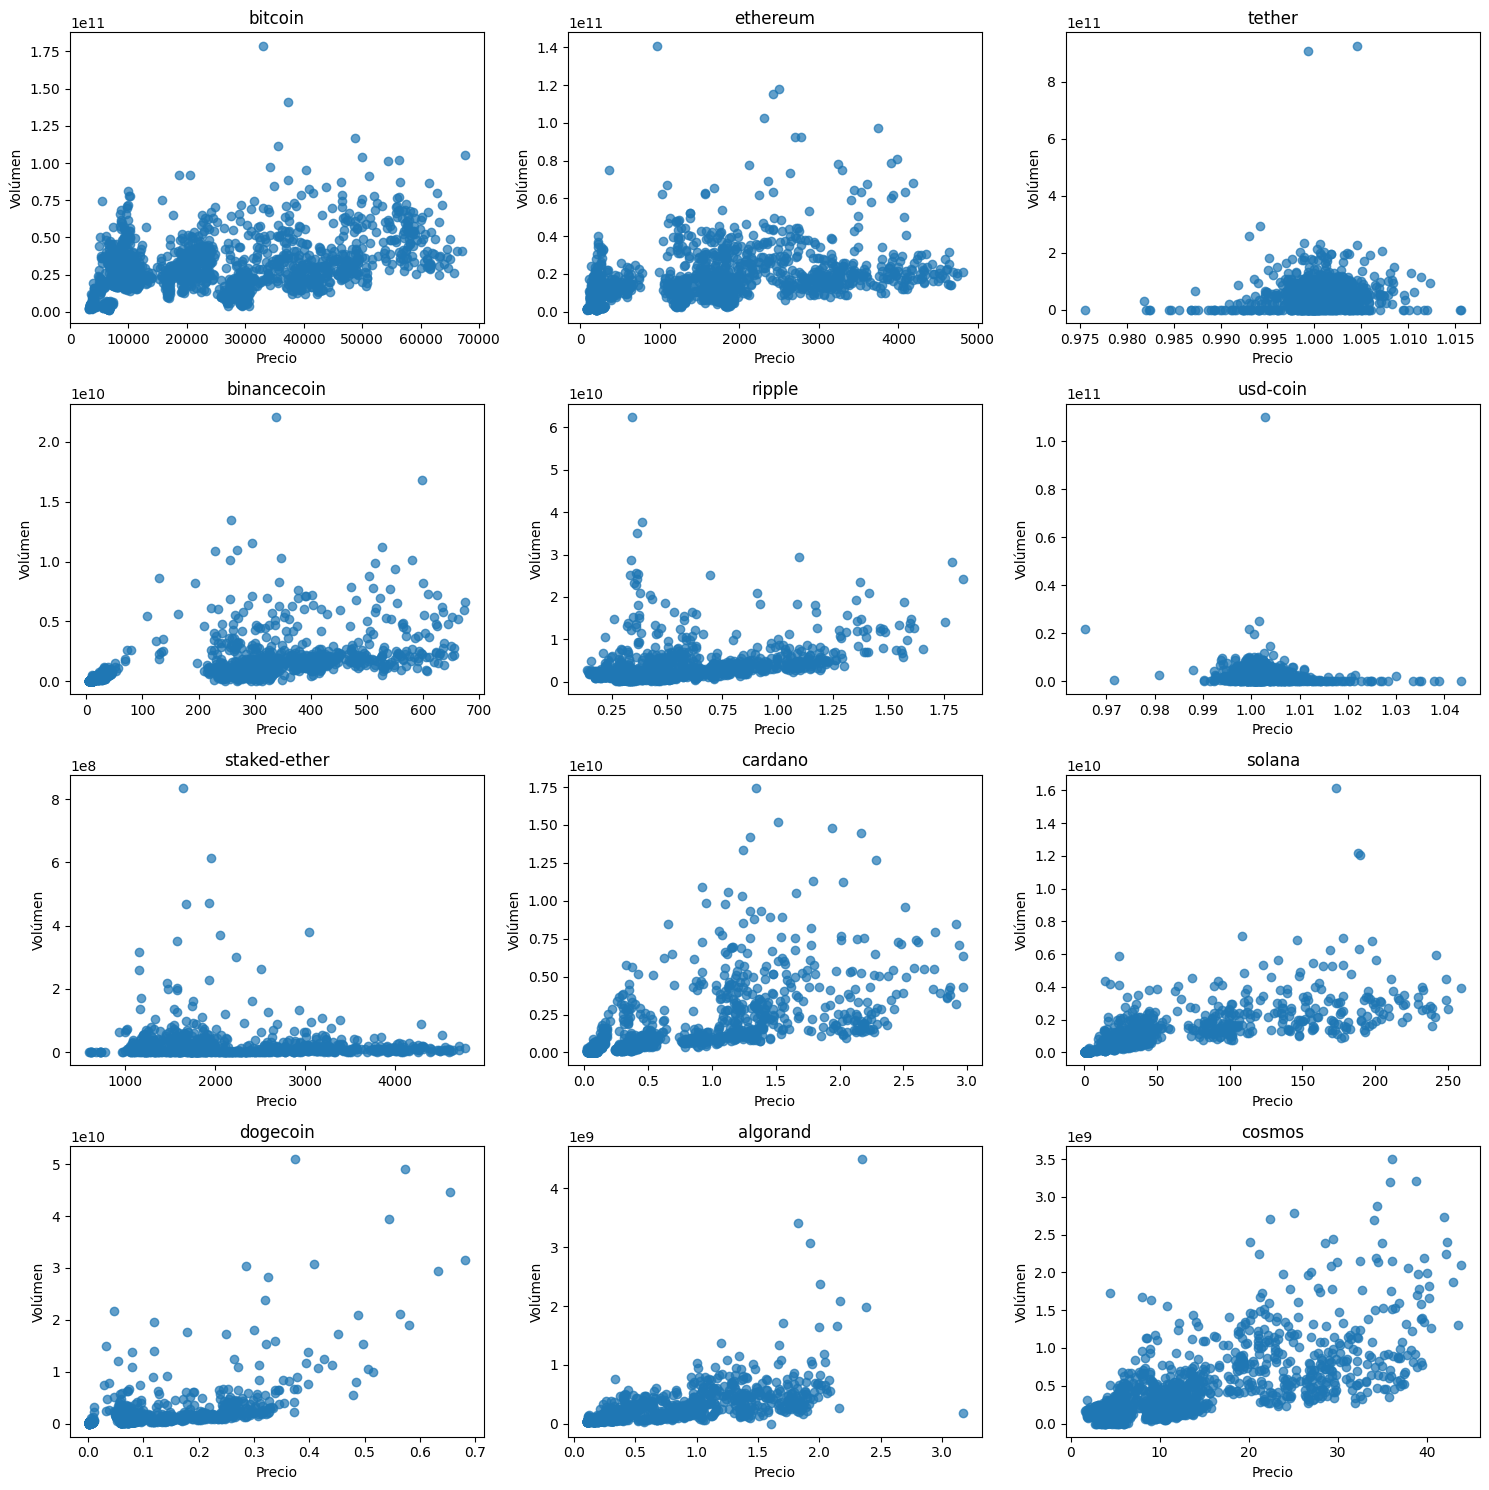

In [21]:
# Obtener una lista de criptomonedas únicas
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas para subplots
num_filas = 4
num_columnas = 3

# Crear una figura y subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas,
                         figsize=(15, 15))  # Ajusta el tamaño según tus preferencias

# Iterar a través de cada criptomoneda única y crear un scatter plot en el subplot correspondiente
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Calcular la posición en el grid de subplots
    row = i // num_columnas
    col = i % num_columnas
    
    # Crear el scatter plot en el subplot correspondiente
    axes[row, col].scatter(crypto_data['Prices'], crypto_data['Volumes'], alpha=0.7)
    
    # Configurar título del subplot
    axes[row, col].set_title(crypto)
    axes[row, col].set_xlabel('Precio')
    axes[row, col].set_ylabel('Volúmen')

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()

**Explicación:** Se puede observar que en general los precios y los volumenes de negociación de las criptomonedas no parecen tener una relación positiva significativa.

**b) Gráfico de dispersión de Precios y Capitalización de mercado**
- A continuación se detalla el paso a paso para elaborar el gráfico:

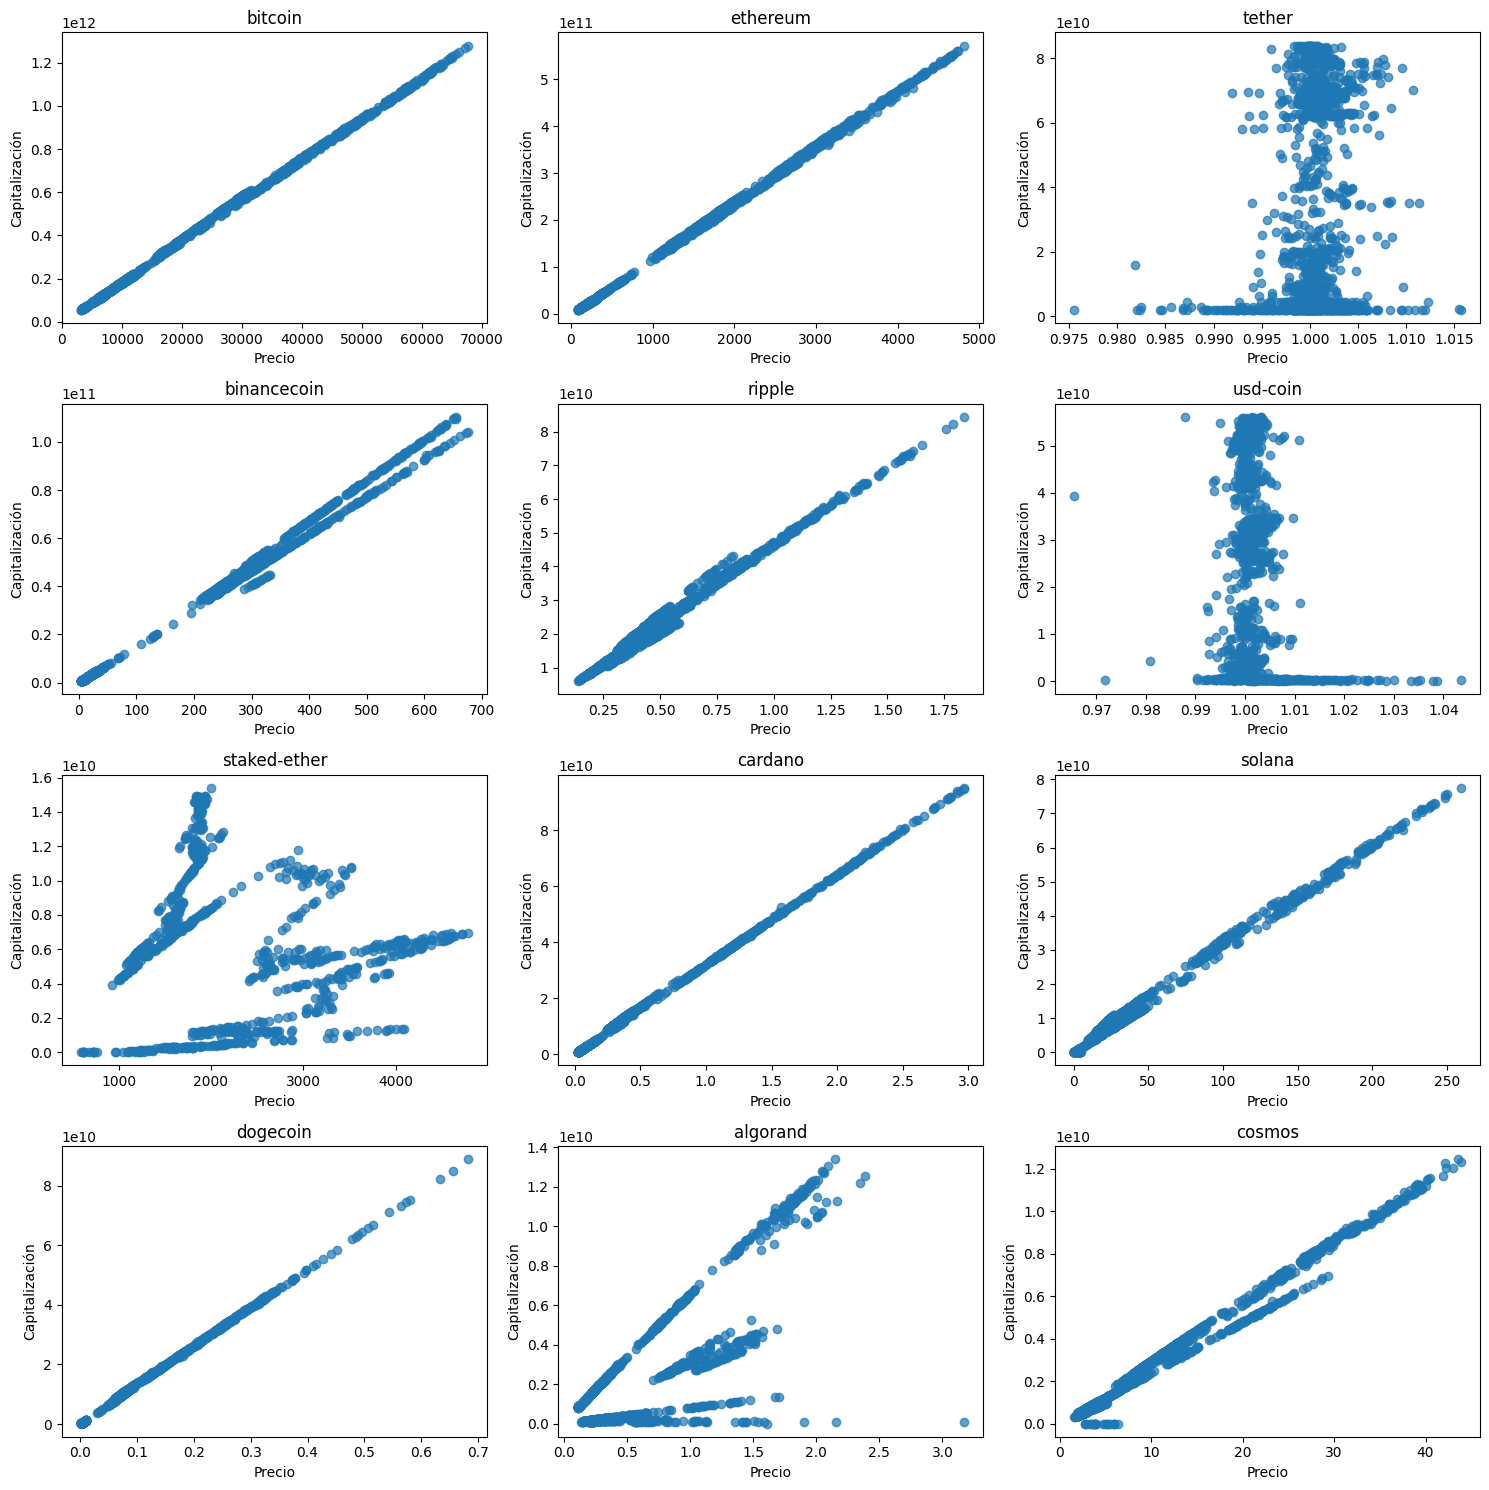

In [22]:
# Obtener una lista de criptomonedas únicas
criptos_unicas = cryptos_df['Id'].unique()

# Definir el número de filas y columnas para subplots
num_filas = 4
num_columnas = 3

# Crear una figura y subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas,
                         figsize=(15, 15))  # Ajusta el tamaño según tus preferencias

# Iterar a través de cada criptomoneda única y crear un scatter plot en el subplot correspondiente
for i, crypto in enumerate(criptos_unicas):
    # Filtrar los datos solo para la criptomoneda actual
    crypto_data = cryptos_df[cryptos_df['Id'] == crypto]
    
    # Calcular la posición en el grid de subplots
    row = i // num_columnas
    col = i % num_columnas
    
    # Crear el scatter plot en el subplot correspondiente
    axes[row, col].scatter(crypto_data['Prices'], crypto_data['Market_Cap'], alpha=0.7)
    
    # Configurar título del subplot
    axes[row, col].set_title(crypto)
    axes[row, col].set_xlabel('Precio')
    axes[row, col].set_ylabel('Capitalización')

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()

**Explicación:** 
1. A diferencia del anterior gráfico se puede observar en este fuertes relaciones positivas entre los precios y la capitalización de mercado de las cryptomonedas. Esto se puede explicar principalmente por que la capitalización de mercado es calculada a partir del precio del activo. 
2. En el caso de las stablecoins Tether y USD-Coin, no parece haber una existir una relación positiva y se podría decir que no existe una relación significativa entre ambas variables.

### **4.2 Correlaciones**

**a) Correlaciones de establecoins**
- Debido a la singularidad en el gráfico de disperción para las stablecoins, se analizará sus correlaciones. 

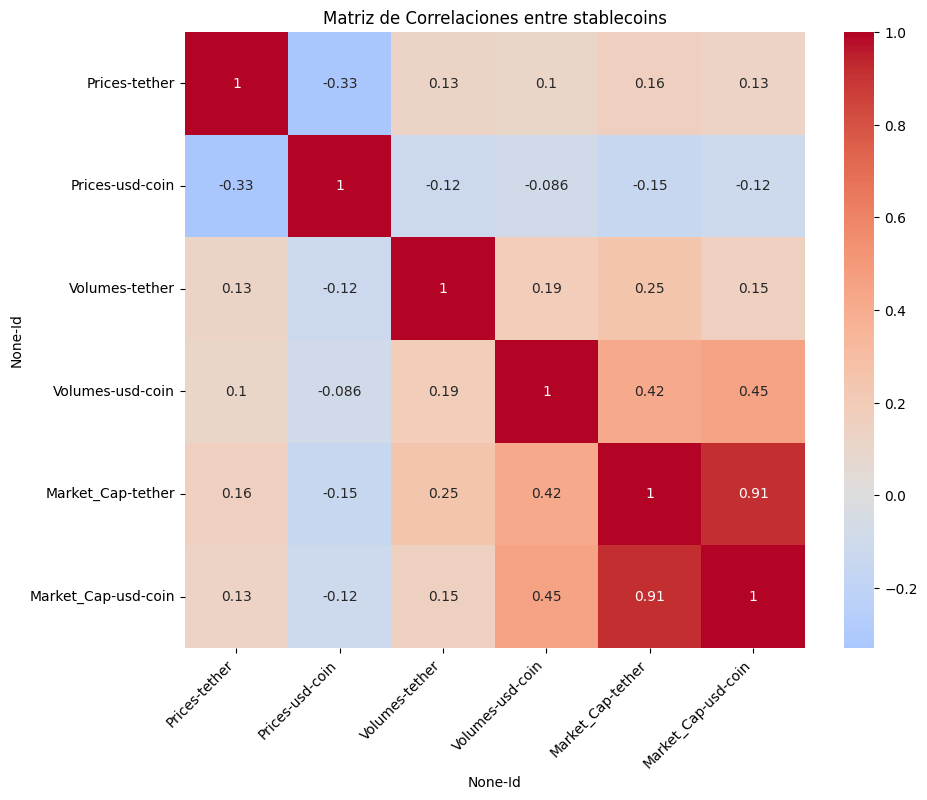

In [23]:
#Filtramos las stablecoin
stable_mask = cryptos_df[cryptos_df['Id'].isin(['tether', 'usd-coin'])]

# Pivotear los datos para tener una estructura de matriz
pivot_df = stable_mask.pivot(index='Date', columns='Id', values=['Prices', 'Volumes', 'Market_Cap'])

#Calculamos las correlaciones de las variables 
correlation_matrix = pivot_df.corr()

# Crear una figura y un heatmap de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones entre stablecoins')
# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis:**
- Como se aprecio en el gráfico de disperción, la correlación entre el precio y la capitalización de mercado de las stablecoins no es significativa. 
- Se aprecia correlaciones altas entre las capitalizaciónes de mercado de ambas stablecoins con un valor de 0.91, entendiendo que 1 es una correlación perfecta. Esto podría explicarse por que ambas criptos operan en el mismo mercado y las variables que tienden a darles valor estan tambien muy relacionadas. 

**b) Correlaciones entre los precios de las criptomonedas**
- A continuación se busca determinar si existe relaciones entre los precios de las criptomonendas analizadas, la explicación del código es la siguiente:

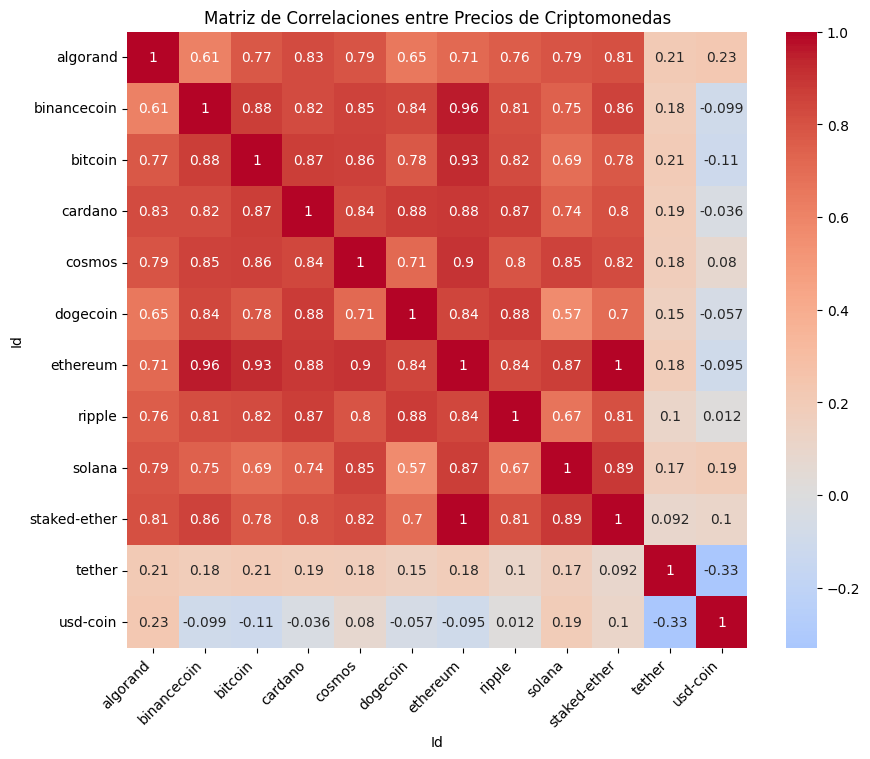

In [24]:
# Pivotear los datos para obtener un DataFrame con cada criptomoneda como columna y las fechas como índice
pivot_df = cryptos_df.pivot(index='Date', columns='Id', values='Prices')

# Calcular la matriz de correlaciones
correlation_matrix = pivot_df.corr()

# Crear una figura y un heatmap de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones entre Precios de Criptomonedas')
# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis:**
1. Se puede apreciar que todas las criptomonedas analizadas a excepción de las stablecoins tiene correlaciones positivas altas. Destacando las relaciones entre:
    - Ethereum y Staked-Ether, con una correlación perfecta de 1. Esto se explica por que Staked-Ether es una criptomoneda derivada de Ethereum, por lo que sus precios estan estrechamente relacionados. 
    - Ethereum con Binance-Coin y Ethereum con Bitcoin, al ser las monedas con mejor posicionamiento de mercado sus valores en terminos de precios siguen una conducta de activos complementarios. 
2. Las stablecoins a pesar de ambas tener una paridad con el dolar americano de 1:1, tienen una correlación negativa. Se podría explicar a que al ser activos que apuntan al mismo mercado, el crecimiento en terminos de precio podría tener un comportamiento de activos sustitutos. Sin embargo, requieren una profundización para entender el fenomeno. 

**b) Correlaciones entre los volumenes de negociación de las criptomonedas**

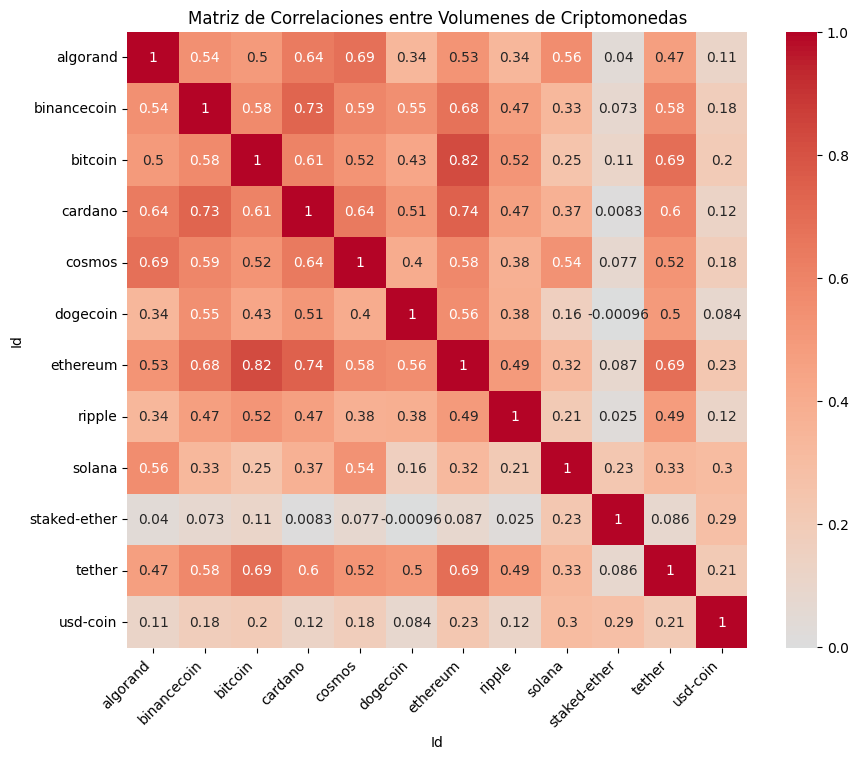

In [34]:
# Pivotear los datos para obtener un DataFrame con cada criptomoneda como columna y las fechas como índice
pivot_df = cryptos_df.pivot(index='Date', columns='Id', values='Volumes')
pivot_df.fillna(0, inplace=True)
# Calcular la matriz de correlaciones
correlation_matrix = pivot_df.corr()

# Crear una figura y un heatmap de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones entre Volumenes de Criptomonedas')
# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis:**
1. Las correlaciones entre los volúmenes de negociación de las criptomonedas analizadas no es tan pronunciada como en el caso de los precios.
2. La correlación más alta entre criptomonedas es la de Bitcoin - Ethereum y Cardano-Ethereum con correlaciones de 0.82 y 0.74 respectivamente. 
3. Las criptomonedas que menos correlación de su vólumen tienen con el resto son Staked-Ether y USD-Coin. 

**d) Correlaciones entre la capitalización de mercado de las criptomonedas**

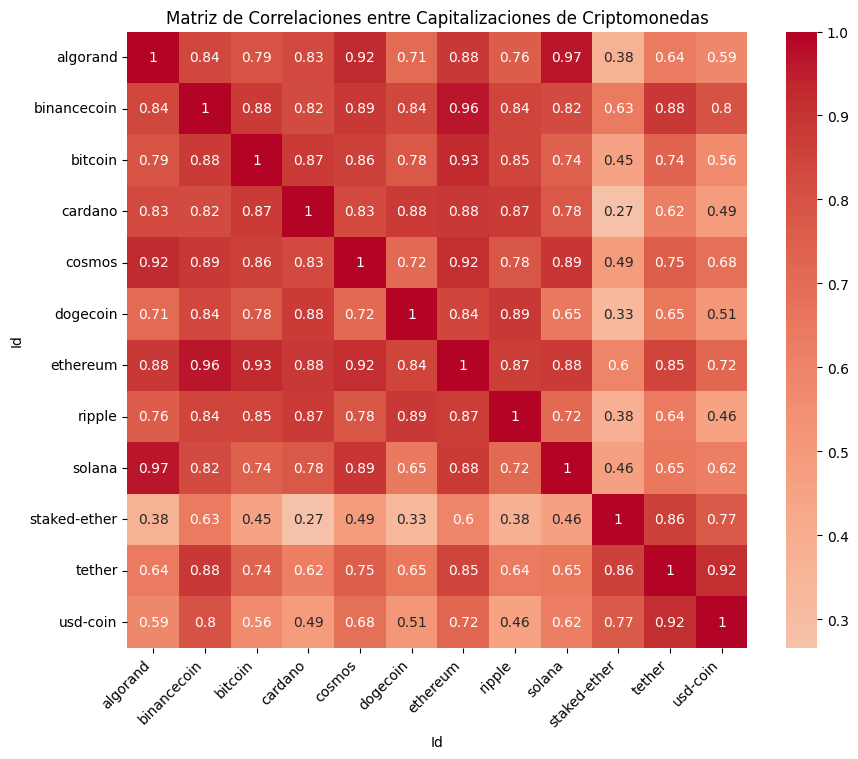

In [37]:
# Pivotear los datos para obtener un DataFrame con cada criptomoneda como columna y las fechas como índice
pivot_df = cryptos_df.pivot(index='Date', columns='Id', values='Market_Cap')
pivot_df.fillna(0, inplace=True)
# Calcular la matriz de correlaciones
correlation_matrix = pivot_df.corr()

# Crear una figura y un heatmap de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones entre Capitalizaciones de Criptomonedas')
# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis**
1. Las capitalizaciones de mercado de todas las criptomonedas tienen valores altos, demostrando que existe la tendencia de que si ciertas criptomonedas en especifico suben su valor el resto de criptomonedas también lo harán(unas más significativamente que otras) por un efecto de arraste. 

**e) Correlaciones entre las criptos más influyentes**
- De acuerdo a la visto en los anteriores gráficos, existen 3 criptomonedas ('bitcoin','ethereum','cardano) y la stablecoin tether que tienen mucha correlación con el resto de las monedas, se realizará las correlaciones entre estás monedas y sus respectivas variables. 

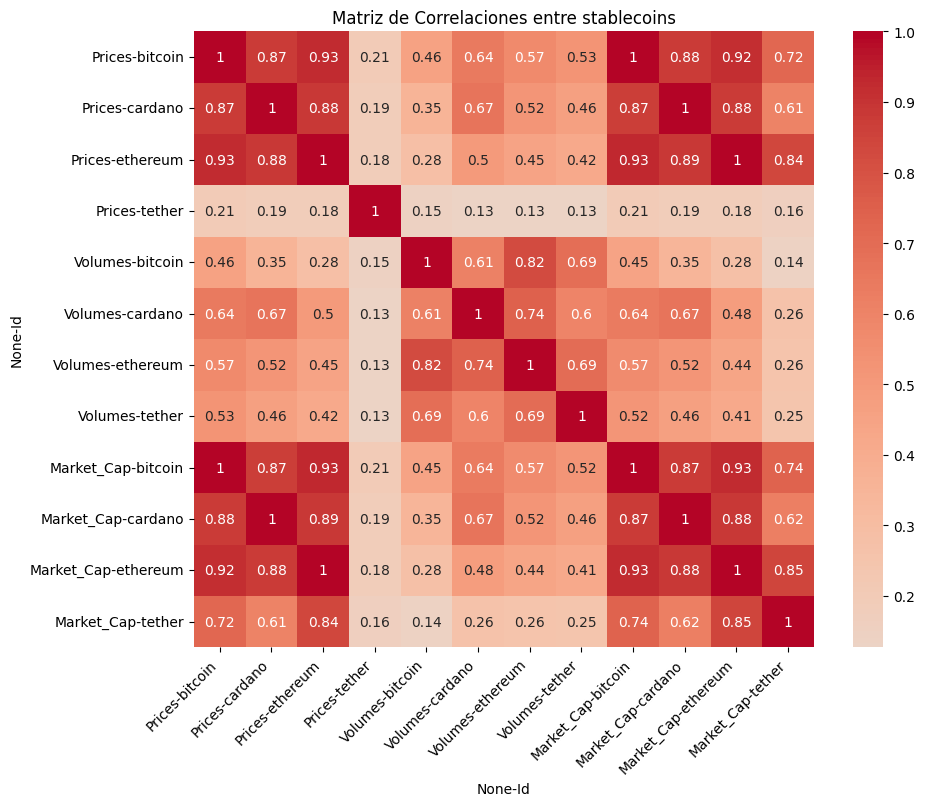

In [38]:
#Filtramos las stablecoin
stable_mask = cryptos_df[cryptos_df['Id'].isin(['bitcoin','ethereum','cardano','tether'])]

# Pivotear los datos para tener una estructura de matriz
pivot_df = stable_mask.pivot(index='Date', columns='Id', values=['Prices', 'Volumes', 'Market_Cap'])

#Calculamos las correlaciones de las variables 
correlation_matrix = pivot_df.corr()

# Crear una figura y un heatmap de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones entre stablecoins')
# Rotar las etiquetas del eje X para mejor legibilidad si hay muchos IDs
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis**
1. Bitcoin es la criptomoneda que tiene una correlación alta sostenida con todas las criptomonedas en las tres variables analizadas. Lo que remarca su posición e influencia en el mercado cripto y respecto a las correlaciones entre sus propias variables, solo el precio y la capitalización de mercado tienen una correlación alta.
2. Tether, es la única moneda cuyo precio no es afectado por ninguna otra variable ni otra moneda. Sin embargo su capitalización si tiene una correlación alta con los precios y capitalizaciónes de Bitcoin, Cardano y Ethereum. 

## **5. Conclusiones**

- Se tiene 19904 registros correspondientes a los precios, volumenes de negociación y capitalización de mercado de las 12 criptomonedas en un periodo de 5 años del 15/08/2018 al 15/08/2023.
- El dataframe no tiene valores nulos.
- En el dataframe analizado no existen datos duplicados. 
- De las 12 criptomonedas escogidas las que dileran el mercado son Bitcoin, Ethereum y Tether. 
- Las criptomonedas **Algorand, Cosmos, Solana, Staked-Ether y USD-Coin** tienen menos registros por que sus fechas de inicio de circulación en el mercado fueron posteriores a la fecha de cohorte 15 de Agosto del 2018. 
- El análisis de las desviaciones estandar de los precios de las criptomonedas las califica como activos de alta volatilidad y por lo tanto riesgosos. Sin embargo, sumamente rentables en el largo tiempo. 
- De acuerdo a las desviaciones estandar del volúmen y la capitalización de mercado las criptomonedas muestran un comportamiento con mucha variabilidad, posteriormente en los gráficos se puede apreciar que estos cambios suelen ser estacionales y siguen la tendencia de las criptomonedas más influyentes. 
- Las stablecoins Tether y USD-Coin no siguen el comportamiento volatil en precios, debido a su parida de 1:1 con el dolar. 
- Las distribuciones de las criptomomendas se muestran sesgadas a la derecha con una gran acumulación de sus datos al lado izquierdo de la misma. En las stablecoins sus distribuciones son más simetricas con variaciones de precios tanto a la derecha como la izquierda. 
- Las criptomonedas que no tienen valores **atípicos** en el cohorte realizado son: Bitcoin, Binance coin y Staked-Ether. 
- Ethereum, Ripple, Cardano, Solana, Cosmos, Algorand y DogeCoin muestran varios outliers en sus precios para el lado superior del diagrama. Estos estan explicados por el comportamiento "natural" de las criptomonedas y son reflejados en una tendencia común del mercado que ya fue explicada en en análisis univariado del precio. Es por ello que no serán excluidos a pesar de afectar en la media y desviación estandar.
- Respecto al volúmen de negociación todas las criptomonedas presentan valores atípicos, lo cual es normal entendiendo el dinamismo del mercado. 
- Las variables que muestran mayor correlación entre si son los precios y la capitalización de mercado. 
- Bitcoin y Ethereum muestran correlaciones en todas su variables con el resto de monedas, esto las posiciona como las monedas que requieren mayor vigilancia. 